<a href="https://colab.research.google.com/github/Mayher2000/Pytorch/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

Necessary knowledge you can find in PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [2]:
!mkdir data

1. PyTorch is based on tensor operations.
Please create tensors in the following ways:
- directly with python list
- from `numpy`
- with random values (initialize generator with your academic id / student number from USOS system)
- linear space in range from -5 to 15 and number of elements.
- 3 tensors with indices of each element of grid for dimensions: 1, 2, 3 (without 0-th - basically is a batch dim)

For all cases use `shape = (1, 3, 28, 28)`.

For display use `print` function.

In [3]:
import torch
import numpy as np

# Creating a tensor directly from a Python list
tensor_from_list = torch.tensor([[list(range(28))]*28]*3)
print("Tensor from Python list:")
print(tensor_from_list.shape)
print(tensor_from_list)

# Creating a tensor from a NumPy array
numpy_array = np.random.rand(1, 3, 28, 28)
tensor_from_numpy = torch.from_numpy(numpy_array)
print("\nTensor from NumPy array:")
print(tensor_from_numpy.shape)
print(tensor_from_numpy)

# Creating a tensor with random values using a random seed
torch.manual_seed(12345)
random_tensor = torch.randn(1, 3, 28, 28)
print("\nRandom Tensor:")
print(random_tensor.shape)
print(random_tensor)

# Creating a tensor with linear space values
linear_tensor = torch.linspace(-5, 15, 28*28*3).reshape(1, 3, 28, 28)
print("\nLinear Tensor:")
print(linear_tensor.shape)
print(linear_tensor)

# Creating tensors with indices of each element of a grid
grid_indices_1 = torch.tensor(np.indices((1, 3, 28, 28))[1])
grid_indices_2 = torch.tensor(np.indices((1, 3, 28, 28))[2])
grid_indices_3 = torch.tensor(np.indices((1, 3, 28, 28))[3])
print("\nGrid Indices Tensor 1:")
print(grid_indices_1.shape)
print(grid_indices_1)
print("\nGrid Indices Tensor 2:")
print(grid_indices_2.shape)
print(grid_indices_2)
print("\nGrid Indices Tensor 3:")
print(grid_indices_3.shape)
print(grid_indices_3)


Tensor from Python list:
torch.Size([3, 28, 28])
tensor([[[ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         ...,
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27]],

        [[ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         ...,
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27]],

        [[ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         ...,
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27],
         [ 0,  1,  2,  ..., 25, 26, 27]]])

Tensor from NumPy array:
torch.Size([1, 3, 28, 28])
tensor([[[[0.2719, 0.1053, 0.6916,  ..., 0.6212, 0.2975, 0.0423],
          [0.1907, 0.3760, 0.7691,  ..., 0.634

2. PyTorch allow for applying GPU for computations.
Check is gpu (CUDA) is available, then use it as `device`, else use `'cpu'`.

In [4]:
device = torch.device("cuda")
print("CUDA is available. Using GPU.")

CUDA is available. Using GPU.


3. To train a networks we need a dataset.

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

You can try to apply different transforms.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`.

Next display sizes of datasets, shapes of elements and display few images and their labels.

100%|██████████| 9912422/9912422 [00:00<00:00, 99180593.25it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 57031870.92it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27486333.71it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16623498.05it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train dataset size: 60000
Test dataset size: 10000
Sample data shape: torch.Size([1, 28, 28])
Sample target shape: 5


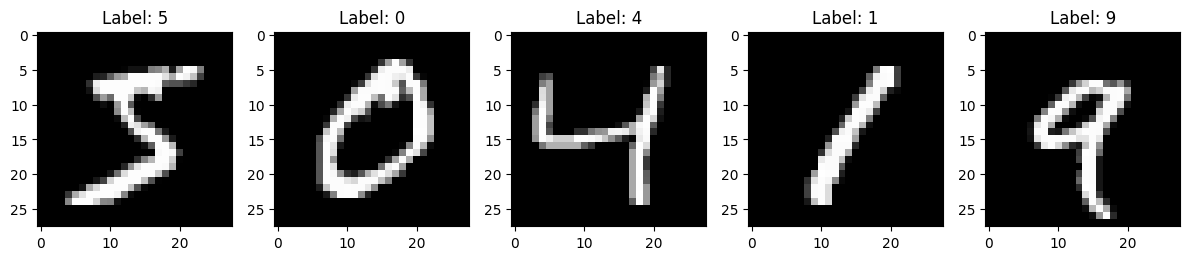

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Download the train dataset
train_data = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download the test dataset
test_data = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=ToTensor(),
)

# Create train and test DataLoaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Display dataset sizes
print("Train dataset size:", len(train_data))
print("Test dataset size:", len(test_data))

# Display shape of a sample element
sample_data, sample_target = train_data[0]
print("Sample data shape:", sample_data.shape)
print("Sample target shape:", sample_target)

# Display a few sample images with labels
num_samples = 5
fig, axs = plt.subplots(1, num_samples, figsize=(12, 4))

for i in range(num_samples):
    data, target = train_data[i]
    image = data.squeeze().numpy()
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title("Label: {}".format(target))

plt.tight_layout()
plt.show()


4. `*`Additionally, you can prepare analysis of datasets.

E.g. statistics like mean and variance of all elements, for each label.

Analysis can allow you for designing better network architecture.   

5. When we have datasets, so we can create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron

with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first with 512 neurons,
- second with 512 neurons,
- output layer adjust to size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities!

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Network layer-by-layer processing define in `forward` method with argument as a network

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.


In [6]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self, input_shape, output_size):
        super(MLP, self).__init__()

        # Calculate the input size for the first fully connected layer
        input_size = input_shape[0] * input_shape[1] * input_shape[2]

        # Define the layers
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Instantiate the model
input_shape = (1, 28, 28)  # Assuming input images are grayscale
output_size = 10  # Number of classes for classification
net = MLP(input_shape, output_size)


6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [7]:
# Instantiate the CrossEntropyLoss
loss_fcn = nn.CrossEntropyLoss()

7. To score network define accuracy metric.
For network output you need to decide what is the final network answer.
(`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [8]:
from abc import ABC, abstractmethod
from typing import Any
import torch

class BaseMetic(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()


class AccuracyMetic(BaseMetic):

    def __init__(self) -> None:
        pass

    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        # Get the predicted labels by finding the index of the maximum value along the second dimension
        predicted_labels = torch.argmax(y_pred, dim=1)

        # Calculate the accuracy metric by comparing the predicted labels with the reference labels
        accuracy = (predicted_labels == y_ref).float().mean()

        return accuracy


metric = AccuracyMetic()


8. To change network parameters, we need optimizers object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001

In [9]:
import torch.optim as optim

# Instantiate the SGD optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

9. Now define training / testing function:

In [10]:
from typing import Tuple
import tqdm


def train(model,
          data_generator,
          criterion,
          metric: BaseMetic,
          mode: str = 'test',
          optimizer: torch.optim.Optimizer = None,
          update_period: int = None,
          device = torch.device('cpu')) -> Tuple[torch.nn.Module, float, float]:

    # Change model mode to train or test
    if mode == 'train':
        model.train()
    elif mode == 'test':
        model.eval()
    else:
        raise RuntimeError("Unsupported mode.")

    # Move model to device
    model = model.to(device)

    # Reset model parameters' gradients with optimizer
    if mode == 'train':
        optimizer.zero_grad()

    total_loss = 0.0
    total_accuracy = 0.0
    samples_num = 0

    for i, (X, y) in tqdm.tqdm(enumerate(data_generator)):
        # Convert tensors to device
        X = X.to(device)
        y = y.to(device)

        # Depending on mode, use or not torch.no_grad() as 'with' block
        with torch.no_grad() if mode == 'test' else torch.enable_grad():
            # Process by network
            y_pred = model(X)

            # Calculate loss
            loss = criterion(y_pred, y)

            if mode == 'train':
                # Designate gradient based on loss
                loss.backward()

                if (i+1) % update_period == 0:
                    # Update parameters with optimizer
                    optimizer.step()
                    optimizer.zero_grad()

        # Calculate accuracy
        accuracy = metric(y_pred, y)

        total_loss += loss.item() * y_pred.shape[0]
        total_accuracy += accuracy.item() * y_pred.shape[0]
        samples_num += y_pred.shape[0]

    if samples_num == 0:
        return model, 0.0, 0.0

    return model, total_loss / samples_num, total_accuracy / samples_num


10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement auto-detection of bias-variance tradeoff point, to break further training.
- `***` additionally, use learning rate scheduler.
- for each epoch collect losses and accuracies for both datasets.

In [11]:
from typing import List

def train_loop(model,
               train_loader,
               test_loader,
               criterion,
               metric: BaseMetic,
               optimizer: torch.optim.Optimizer,
               scheduler: torch.optim.lr_scheduler._LRScheduler,
               num_epochs: int,
               update_period: int,
               device = torch.device('cpu')) -> List[List[float]]:

    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    best_test_accuracy = 0.0
    early_stopping_counter = 0

    for epoch in range(num_epochs):
        # Training
        model, train_loss, train_accuracy = train(model, train_loader, criterion, metric, 'train', optimizer, update_period, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Testing
        with torch.no_grad():
            model, test_loss, test_accuracy = train(model, test_loader, criterion, metric, 'test', device=device)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)

        # Update learning rate with scheduler
        scheduler.step()

        # Early stopping based on bias-variance tradeoff
        if test_accuracy <= best_test_accuracy:
            early_stopping_counter += 1
        else:
            best_test_accuracy = test_accuracy
            early_stopping_counter = 0

        if early_stopping_counter >= 5:
            print("Early stopping: Bias-variance tradeoff reached.")
            break

    return [train_losses, train_accuracies, test_losses, test_accuracies]


11. Display training history.

In [12]:
import matplotlib.pyplot as plt
def display_training_history(train_losses, train_accuracies, test_losses, test_accuracies):
    epochs = len(train_losses)
    x = range(1, epochs+1)

    # Plot losses
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, train_losses, label='Training Loss')
    plt.plot(x, test_losses, label='Testing Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Testing Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(x, train_accuracies, label='Training Accuracy')
    plt.plot(x, test_accuracies, label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



938it [00:15, 62.20it/s]
157it [00:01, 106.15it/s]
938it [00:10, 90.09it/s]
157it [00:01, 104.80it/s]
938it [00:10, 91.59it/s]
157it [00:01, 105.27it/s]
938it [00:10, 90.53it/s]
157it [00:01, 106.54it/s]
938it [00:10, 92.02it/s] 
157it [00:01, 107.23it/s]
938it [00:10, 91.63it/s]
157it [00:01, 110.48it/s]
938it [00:10, 92.19it/s]
157it [00:01, 104.63it/s]
938it [00:11, 83.08it/s]
157it [00:01, 106.61it/s]
938it [00:10, 92.42it/s]
157it [00:01, 107.41it/s]


Early stopping: Bias-variance tradeoff reached.


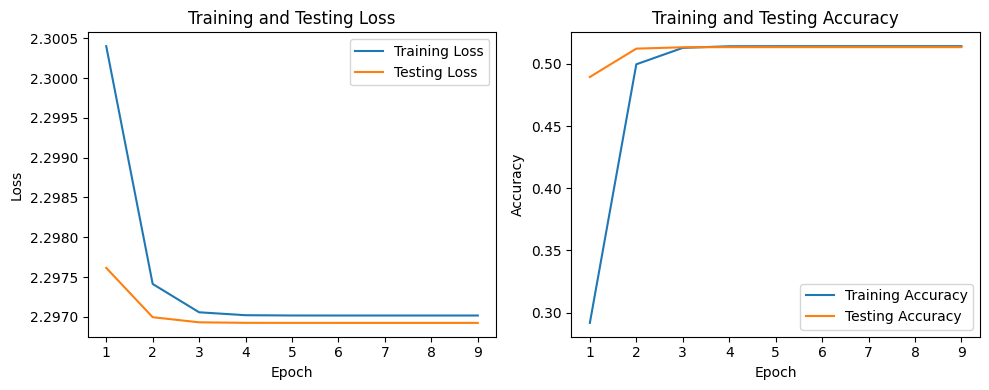

In [13]:
from torch.optim.lr_scheduler import StepLR

# Define the learning rate scheduler

update_period = 100  # Define the update period
num_epochs = 10
criterion = torch.nn.CrossEntropyLoss()
model = MLP(input_shape, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
# ... define other parameters and data loaders ...

train_losses, train_accuracies, test_losses, test_accuracies = train_loop(model, train_loader, test_loader, criterion, metric, optimizer, scheduler, num_epochs, update_period, device)

# Display the training history
display_training_history(train_losses, train_accuracies, test_losses, test_accuracies)


12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [14]:
# Save the model state to a file
torch.save(model.state_dict(), 'model_state.pth')

# Save the optimizer state to a file
torch.save(optimizer.state_dict(), 'optimizer_state.pth')

13. Create new network with the same architecture and initialize it with saved weights.

`torch.load`, `load_state_dict`.

In [15]:
# 1. Define the architecture of the new network
net2 = MLP(input_shape, output_size)

# 2. Load the saved weights
saved_weights = torch.load('model_state.pth')

# 3. Load the weights into the new network
net2.load_state_dict(saved_weights)


<All keys matched successfully>

14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your custom model
class CustomModel(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(CustomModel, self).__init__()

        self.conv1 = nn.Conv2d(input_shape[0], 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

# Set the device (CPU or GPU) for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the input shape and number of classes
input_shape = (1, 28, 28)
num_classes = 10

# Create an instance of your custom model
model = CustomModel(input_shape, num_classes)

# Move the model to the device
model.to(device)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Define the number of epochs and other training parameters
num_epochs = 10
batch_size = 64

# Training loop
for epoch in range(num_epochs):
    # Set the model in training mode
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    # Print the progress for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Save the trained model weights to a file
torch.save(model.state_dict(), 'custom_model_weights.pth')


Epoch [1/10], Loss: 0.1176, Accuracy: 0.9633
Epoch [2/10], Loss: 0.0428, Accuracy: 0.9864
Epoch [3/10], Loss: 0.0299, Accuracy: 0.9906
Epoch [4/10], Loss: 0.0262, Accuracy: 0.9914
Epoch [5/10], Loss: 0.0198, Accuracy: 0.9934
Epoch [6/10], Loss: 0.0152, Accuracy: 0.9953
Epoch [7/10], Loss: 0.0132, Accuracy: 0.9958
Epoch [8/10], Loss: 0.0137, Accuracy: 0.9955
Epoch [9/10], Loss: 0.0101, Accuracy: 0.9966
Epoch [10/10], Loss: 0.0087, Accuracy: 0.9970


15. You can leave a feedback, if you want :)

16. Send your results(notebook+weights) in a *.zip file by e-mail

or (preferred) send link to your's github (public) repository with your results.